In [4]:
import numpy as np

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

# Polynomial Regression (다항회귀)
- sklearn Polynomial Features

## year 데이터 포함

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from preprocess import get_train_test
import pandas as pd

X, X_year, y, X_test, X_test_year, y_test = get_train_test()
submit_csv = pd.read_csv("./dataset/raw/sample_submission.csv")

# poly 데이터 생성
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(X_year)

# 학습
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

LinearRegression()

In [5]:
y_pred = model.predict(x_poly)
NMAE(y, y_pred)

0.24770129437217603

In [6]:
# test
x_test_poly = poly_features.transform(X_test_year)
y_test_pred = model.predict(x_test_poly)
NMAE(y_test, y_test_pred)

0.3404327847448176

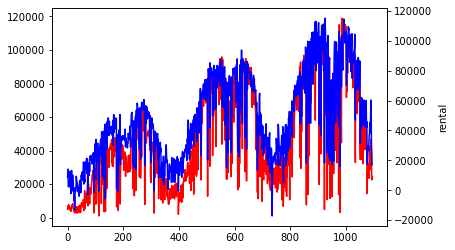

In [9]:
# Train
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(range(len(y)), y, color='red')

ax2 = ax1.twinx()
ax2.plot(range(len(y)), y_pred, color='blue')    # 파란색이 y_pred
plt.xlabel("date")
plt.ylabel("rental")

plt.show()

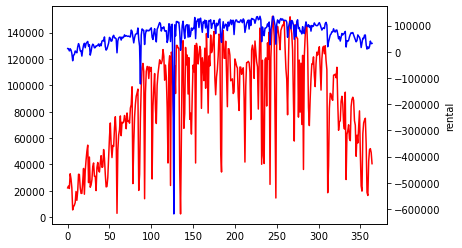

In [11]:
# Test
fig, ax1 = plt.subplots()
ax1.plot(range(len(y_test)), y_test, color='red')

ax2 = ax1.twinx()
ax2.plot(range(len(y_test)), y_test_pred, color='blue')
plt.xlabel("date")
plt.ylabel("rental")

plt.show()